# Regression Model Evaluation 

Regression Models produces numeric outputs.

i.e 
- What's the cost of the flight?
- How much revenue can my business generate for the quarter? 

To evaluate how good model predictions are we need to check predictions against previously unseen smaples that were not used for training. Usually, the dataset is split 30% for testing, 70% for training. 

Common techniques for model performance evaluation are: 
- Visually observing Plots 
- Residual Histograms 
- Evaluate metrics like RMSE (Root Mean Square Error)

In [2]:
!pip install pandas numpy matplotlib scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_squared_error

## Air Passengers Data 

In [8]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df = pd.read_csv('../data/airpassengers_sample.csv', index_col=0)

In [9]:
df.head()

,GDP,Population,Passengers,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
Year,,,,,,,
2008,14.72,304.09,701.78,710,701,850,750
2009,14.42,306.77,679.42,650,670,450,750
2010,14.96,309.34,720.50,700,715,1000,750
2011,15.52,311.64,730.80,750,735,550,750
2012,16.16,313.99,736.70,769,740,700,750


## Plot Data 

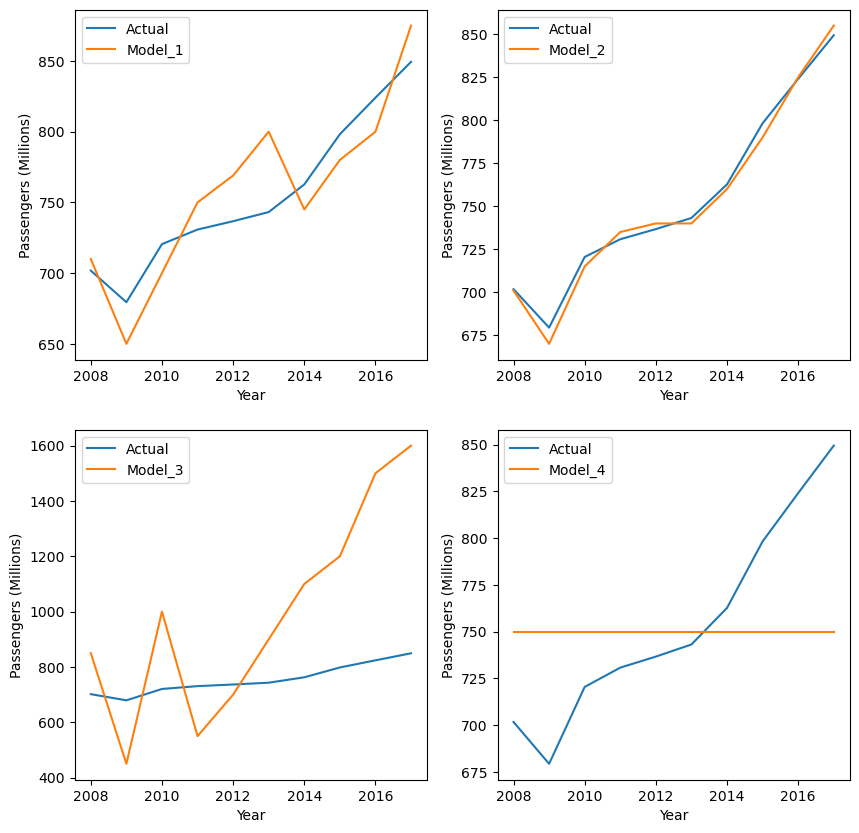

In [11]:
plt.figure(figsize=(10,10))

# Plot Actuals vs Predictions for each model 


# Model 1 
plt.subplot(221)
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['Model1_Prediction'], label='Model_1')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 2
plt.subplot(222)
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['Model2_Prediction'],label='Model_2')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 3
plt.subplot(223)
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['Model3_Prediction'],label='Model_3')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 4
plt.subplot(224)
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['Model4_Prediction'],label='Model_4')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

plt.show()